## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.757161  1.523147  1.334530  0.046306 -0.699265 -0.584813
1 -0.670091  0.734514 -1.380267  1.162711 -1.397763  0.982289
2 -0.551102  1.153236 -0.799827 -1.462453 -1.441380 -1.166256
3  0.755284  0.079690  0.299929  0.289839 -0.829079  0.419569
4 -0.920887 -0.687367  1.416021 -0.960168  1.052206 -0.698024


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9818997	total: 46.7ms	remaining: 46.6s
1:	learn: 0.9725708	total: 47.1ms	remaining: 23.5s
2:	learn: 0.9628052	total: 47.4ms	remaining: 15.8s
3:	learn: 0.9542360	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9476267	total: 48.3ms	remaining: 9.6s
5:	learn: 0.9403200	total: 48.7ms	remaining: 8.06s
6:	learn: 0.9305246	total: 49.2ms	remaining: 6.98s
7:	learn: 0.9216031	total: 49.5ms	remaining: 6.14s
8:	learn: 0.9128183	total: 50ms	remaining: 5.51s
9:	learn: 0.9044254	total: 50.5ms	remaining: 5s
10:	learn: 0.8963059	total: 50.9ms	remaining: 4.58s
11:	learn: 0.8882634	total: 51.4ms	remaining: 4.23s
12:	learn: 0.8800178	total: 51.8ms	remaining: 3.93s
13:	learn: 0.8714273	total: 52.2ms	remaining: 3.67s
14:	learn: 0.8625578	total: 52.5ms	remaining: 3.45s
15:	learn: 0.8549405	total: 52.9ms	remaining: 3.25s
16:	learn: 0.8478785	total: 53.3ms	remaining: 3.08s
17:	learn: 0.8413814	total: 53.6ms	remaining: 2.92s
18:	learn: 0.8342926	total: 54ms	remaining: 2.79s


184:	learn: 0.2118467	total: 120ms	remaining: 527ms
185:	learn: 0.2100778	total: 120ms	remaining: 526ms
186:	learn: 0.2081090	total: 121ms	remaining: 524ms
187:	learn: 0.2064747	total: 121ms	remaining: 522ms
188:	learn: 0.2049132	total: 121ms	remaining: 521ms
189:	learn: 0.2032210	total: 122ms	remaining: 519ms
190:	learn: 0.2012503	total: 122ms	remaining: 517ms
191:	learn: 0.1994382	total: 122ms	remaining: 515ms
192:	learn: 0.1977460	total: 123ms	remaining: 513ms
193:	learn: 0.1963275	total: 123ms	remaining: 512ms
194:	learn: 0.1946176	total: 123ms	remaining: 510ms
195:	learn: 0.1930320	total: 124ms	remaining: 508ms
196:	learn: 0.1916020	total: 124ms	remaining: 506ms
197:	learn: 0.1900997	total: 125ms	remaining: 505ms
198:	learn: 0.1887024	total: 125ms	remaining: 504ms
199:	learn: 0.1871784	total: 126ms	remaining: 502ms
200:	learn: 0.1857695	total: 126ms	remaining: 500ms
201:	learn: 0.1839118	total: 126ms	remaining: 499ms
202:	learn: 0.1825236	total: 127ms	remaining: 497ms
203:	learn: 

450:	learn: 0.0364584	total: 220ms	remaining: 268ms
451:	learn: 0.0362974	total: 220ms	remaining: 267ms
452:	learn: 0.0360948	total: 221ms	remaining: 266ms
453:	learn: 0.0358483	total: 221ms	remaining: 266ms
454:	learn: 0.0356932	total: 221ms	remaining: 265ms
455:	learn: 0.0354542	total: 222ms	remaining: 264ms
456:	learn: 0.0353033	total: 222ms	remaining: 264ms
457:	learn: 0.0350716	total: 222ms	remaining: 263ms
458:	learn: 0.0349249	total: 223ms	remaining: 263ms
459:	learn: 0.0347003	total: 223ms	remaining: 262ms
460:	learn: 0.0344984	total: 224ms	remaining: 262ms
461:	learn: 0.0343374	total: 224ms	remaining: 261ms
462:	learn: 0.0341232	total: 225ms	remaining: 261ms
463:	learn: 0.0339827	total: 225ms	remaining: 260ms
464:	learn: 0.0337898	total: 226ms	remaining: 259ms
465:	learn: 0.0335961	total: 226ms	remaining: 259ms
466:	learn: 0.0334075	total: 226ms	remaining: 258ms
467:	learn: 0.0332223	total: 227ms	remaining: 258ms
468:	learn: 0.0330405	total: 227ms	remaining: 257ms
469:	learn: 

726:	learn: 0.0129782	total: 322ms	remaining: 121ms
727:	learn: 0.0129118	total: 323ms	remaining: 121ms
728:	learn: 0.0128463	total: 323ms	remaining: 120ms
729:	learn: 0.0127819	total: 323ms	remaining: 120ms
730:	learn: 0.0127389	total: 324ms	remaining: 119ms
731:	learn: 0.0127006	total: 324ms	remaining: 119ms
732:	learn: 0.0126606	total: 324ms	remaining: 118ms
733:	learn: 0.0125975	total: 325ms	remaining: 118ms
734:	learn: 0.0125354	total: 325ms	remaining: 117ms
735:	learn: 0.0124986	total: 326ms	remaining: 117ms
736:	learn: 0.0124568	total: 326ms	remaining: 116ms
737:	learn: 0.0123958	total: 326ms	remaining: 116ms
738:	learn: 0.0123357	total: 327ms	remaining: 115ms
739:	learn: 0.0122765	total: 327ms	remaining: 115ms
740:	learn: 0.0122277	total: 328ms	remaining: 114ms
741:	learn: 0.0122051	total: 328ms	remaining: 114ms
742:	learn: 0.0121517	total: 328ms	remaining: 114ms
743:	learn: 0.0121437	total: 329ms	remaining: 113ms
744:	learn: 0.0120910	total: 329ms	remaining: 113ms
745:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

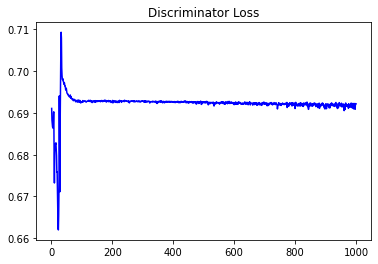

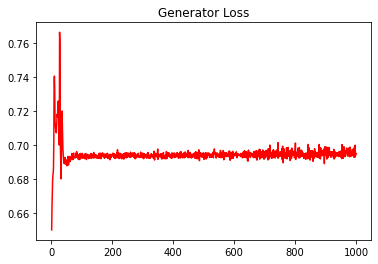

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.31136471575101593


#### Sanity Checks 

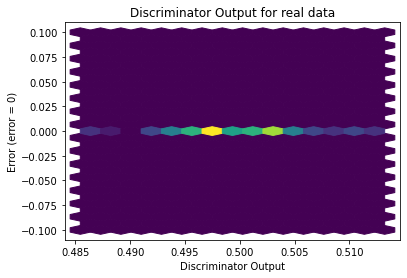

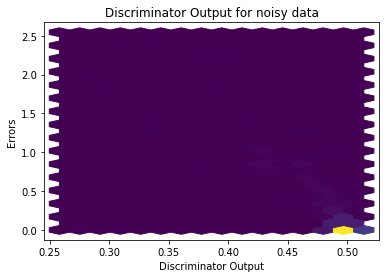

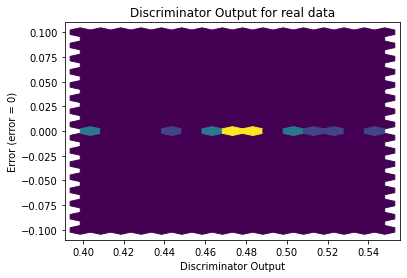

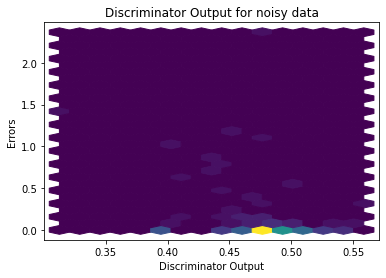

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


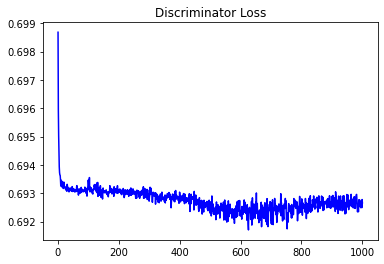

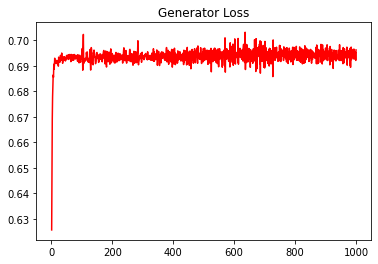

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1639202655134575


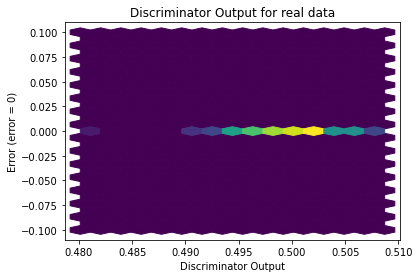

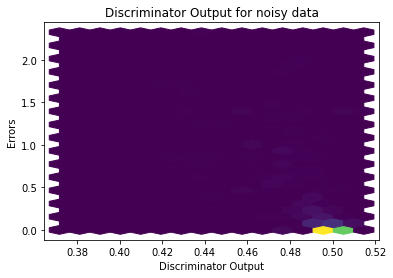

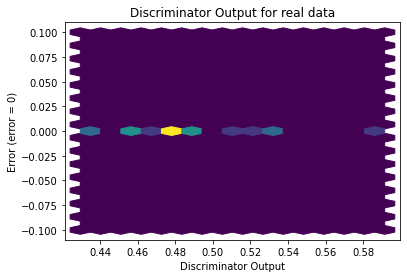

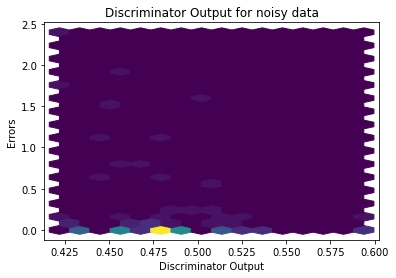

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2107]], device='cuda:0', requires_grad=True)
